# **Cross Validation**
La *Validación Cruzada* es una técnica utilizada para estimar las capacidades de un modelo de machine learning. Generalmente se puede usar la *validación cruzada* como un modelo estadístico para comparar y seleccionar un modelo de machine learning apto para la problemática en cuestión, es una técnica capaz de resolver problemas de *overfitting*. El **objetivo** es devolver un estimado certero de las capacidades del modelo para funcionar en datos nuevos conocido como **generalization error**.
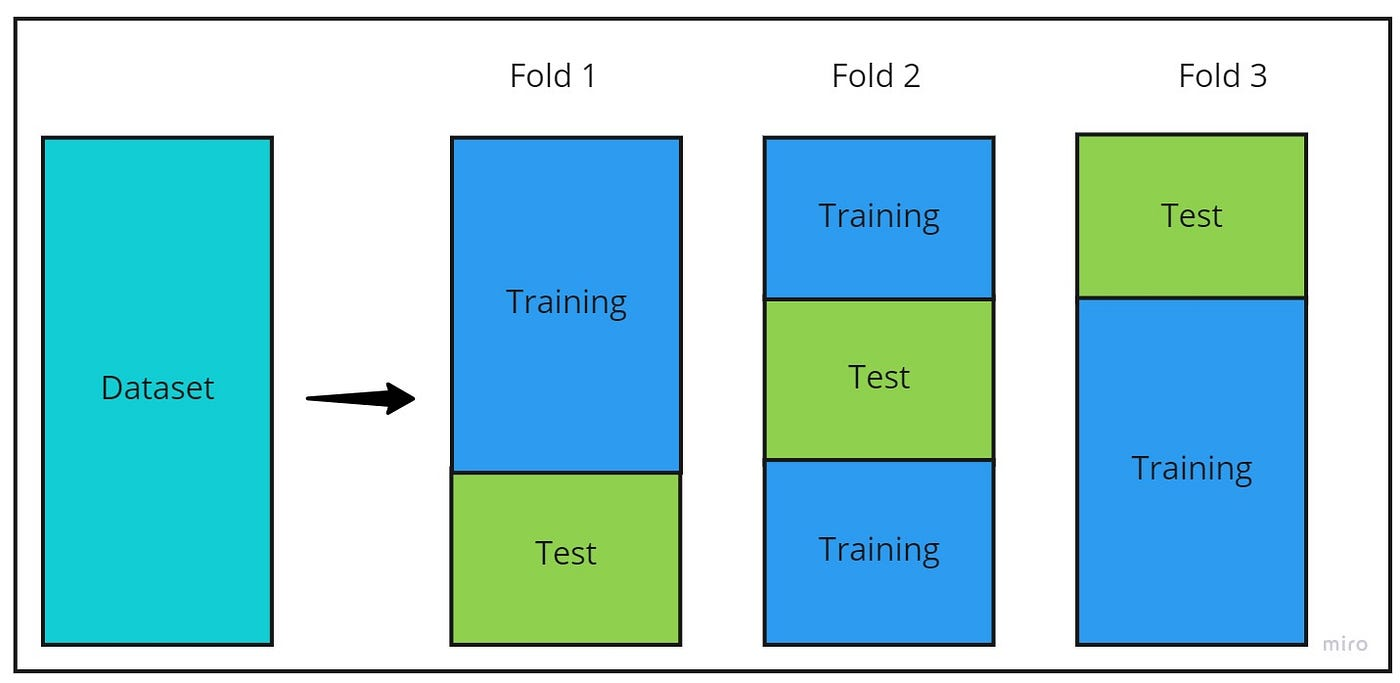 (Towards Data Science, 2018)
### Funcionamiento
El funcionamiento de la *validación cruzada* se basa en dividir los datos en dos distintos grupos, en un `training set` y un `testing set`. Despés estos datos son separados *aleatoriamente* en un grupo de subsets (*folds*) que contienen una cantidad similar de datos. La cantidad de`folds` depende de de varios factores del data set como el tamaño, tipo de datos y el modelo a utilizar. Por ejemplo, al utilizar 10 `folds` usamos el nueve  como valores de entrenamiento y únicamente uno como `training set`. Se debe de realizar el proceso de iteración de acorde a la cantiead de `folds` que tengamos y se realiza auna agregación de todos los resultados para obtener una estimación de el desempeño del modelo en valores nuevos de datos.
### Ejemplo de K-Fold
En la validación cruzada k-fold, el conjunto de datos se divide en k partes, el modelo se entrena y evalúa k veces, y las métricas del rendimiento se promediaon entre todas las k iteraciones. Los valores para k pueden son tres, cinco y diez, siendo k = 5 y k = 10 los más comunes. En cada iteración, una parte se utiliza para pruebas y las k-1 partes restantes para entrenamiento. Este tipo de validación cruzada es de las más comunes y es altamente adaptable a todo tipo de datos. 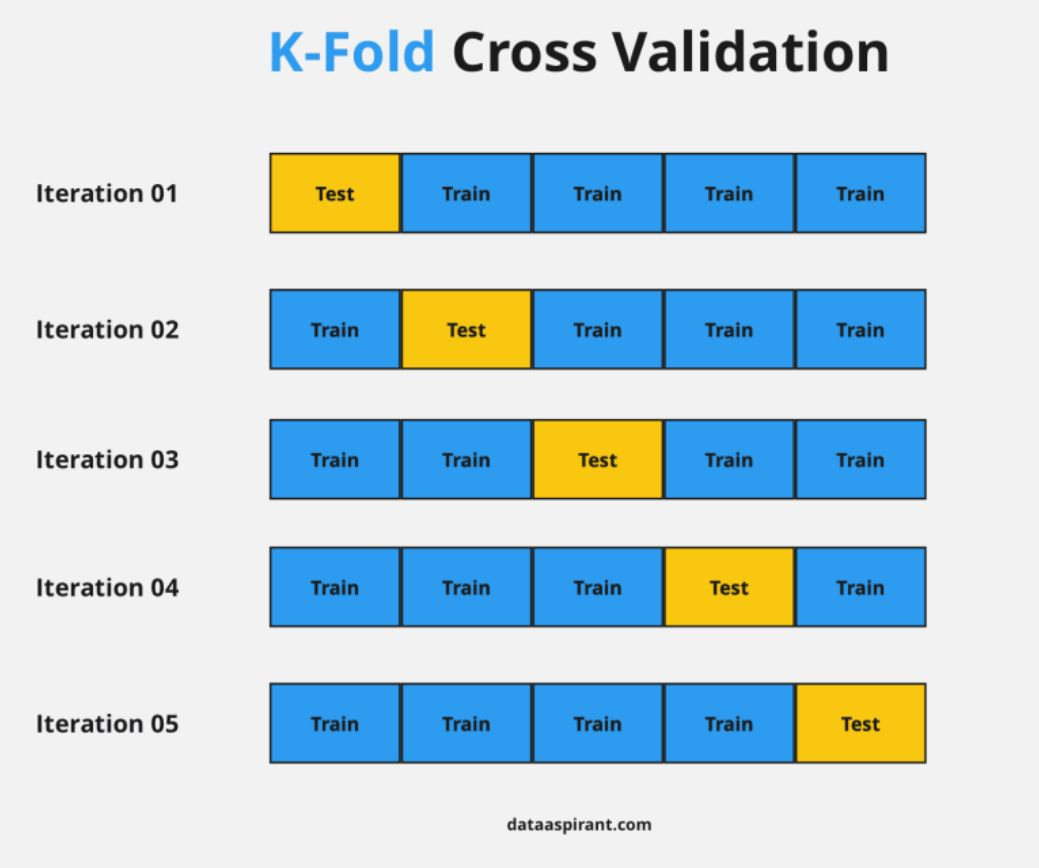 (Deepnote, n.d)


In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [ ]:
#Datos
iris = load_iris()
X = iris.data
y = iris.target
X.shape, y.shape

((150, 4), (150,))

In [ ]:
# 1. K-Fold Cross-Validation para KNN
knn = KNeighborsClassifier(n_neighbors=5)
kf = KFold(n_splits=5)  # Dividir los datos en 5 folds

scores_knn = cross_val_score(knn, X, y, cv=kf)
print("KNN - Scores de K-Fold Cross-Validation:", scores_knn)
print("KNN - Promedio de Accuracy:", scores_knn.mean())

KNN - Scores de K-Fold Cross-Validation: [1.         1.         0.83333333 0.93333333 0.8       ]
KNN - Promedio de Accuracy: 0.9133333333333333


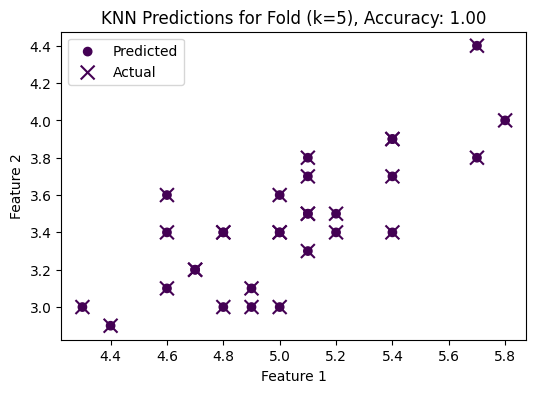

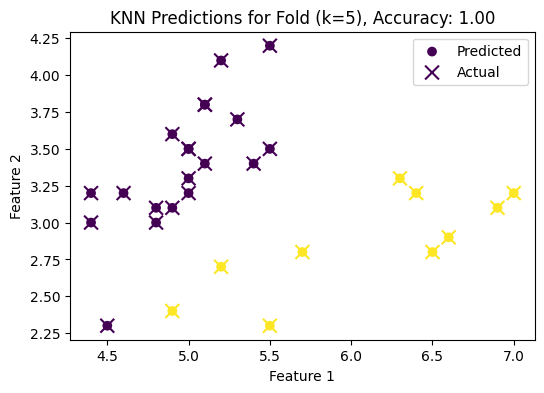

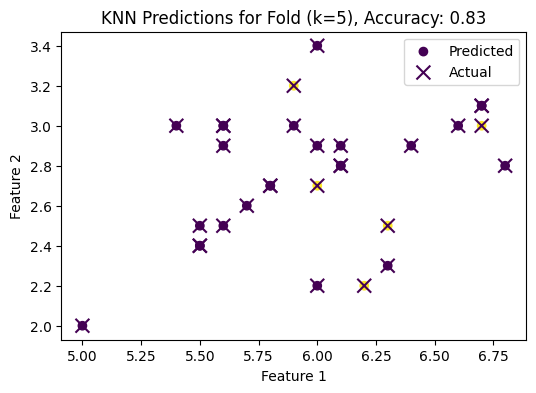

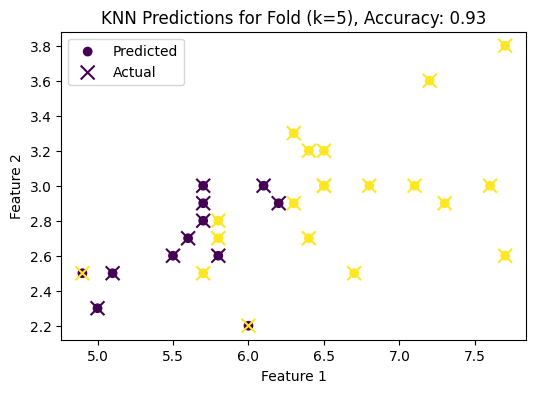

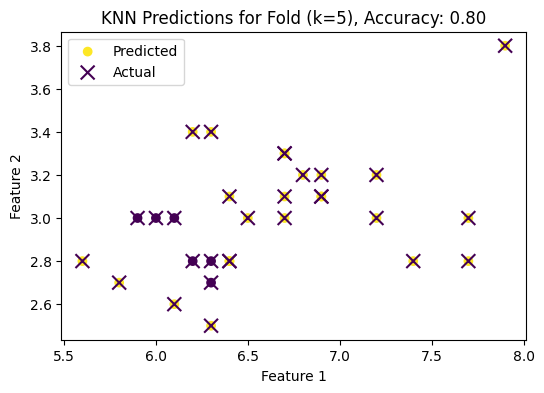

In [ ]:
def plot_knn_fold_predictions(X, y, train_index, test_index, k=5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X[train_index], y[train_index])
    y_pred = knn.predict(X[test_index])

    accuracy = accuracy_score(y[test_index], y_pred)

    plt.figure(figsize=(6, 4))
    plt.scatter(X[test_index, 0], X[test_index, 1], c=y_pred, marker='o', label='Predicted')
    plt.scatter(X[test_index, 0], X[test_index, 1], c=y[test_index], marker='x', s=100, label='Actual')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'KNN Predictions for Fold (k={k}), Accuracy: {accuracy:.2f}')
    plt.legend()
    plt.show()

for fold, (train_index, test_index) in enumerate(kf.split(X,y)):
    plot_knn_fold_predictions(X, y, train_index, test_index)

In [ ]:
# 2. Stratified K-Fold Cross-Validation para SVM
svm = SVC(kernel='linear')
skf = StratifiedKFold(n_splits=5)  # Asegurar distribución de clases en cada fold
scores_svm = cross_val_score(svm, X, y, cv=skf)
print("\nSVM - Scores de Stratified K-Fold Cross-Validation:", scores_svm)
print("SVM - Promedio de Accuracy:", scores_svm.mean())


SVM - Scores de Stratified K-Fold Cross-Validation: [0.96666667 1.         0.96666667 0.96666667 1.        ]
SVM - Promedio de Accuracy: 0.9800000000000001


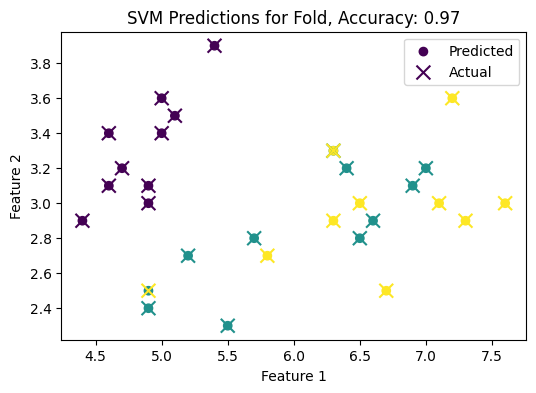

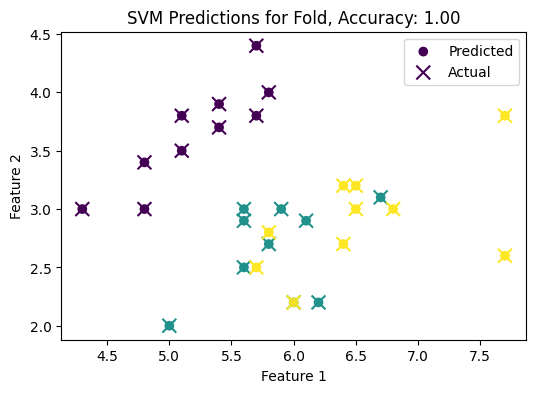

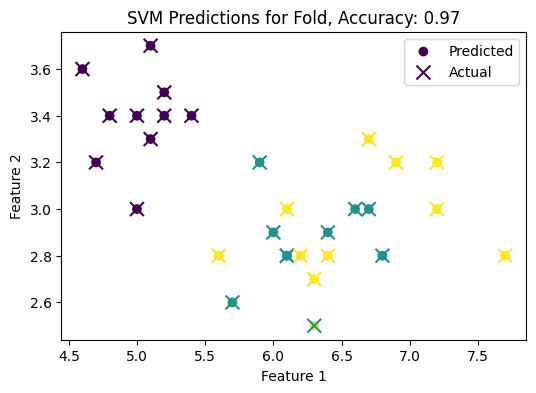

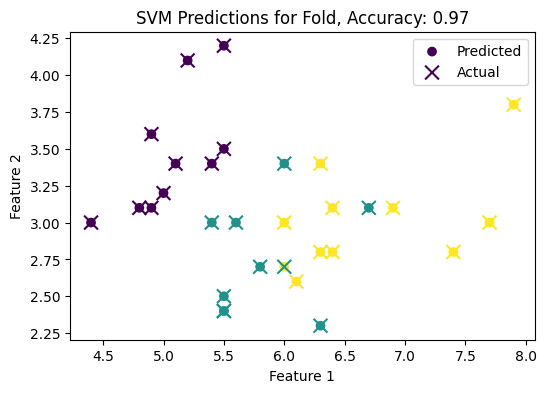

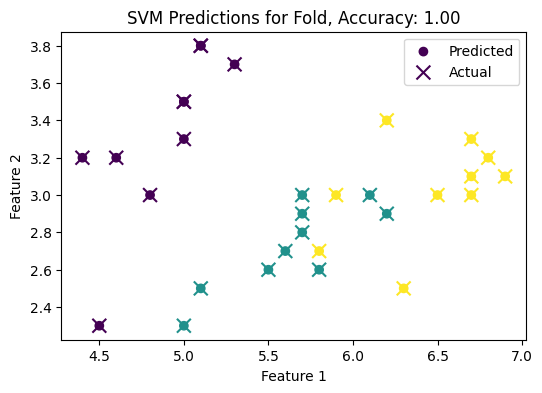

In [ ]:
def plot_svm_fold_predictions(X, y, train_index, test_index):
    svm = SVC(kernel='linear')
    svm.fit(X[train_index], y[train_index])  # Train on training data
    y_pred = svm.predict(X[test_index])  # Predict on test data

    accuracy = accuracy_score(y[test_index], y_pred)  # Calculate accuracy

    plt.figure(figsize=(6, 4))
    plt.scatter(X[test_index, 0], X[test_index, 1], c=y_pred, marker='o', label='Predicted')
    plt.scatter(X[test_index, 0], X[test_index, 1], c=y[test_index], marker='x', s=100, label='Actual')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'SVM Predictions for Fold, Accuracy: {accuracy:.2f}')
    plt.legend()
    plt.show()

for fold, (train_index, test_index) in enumerate(skf.split(X,y)):
    plot_svm_fold_predictions(X, y, train_index, test_index)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


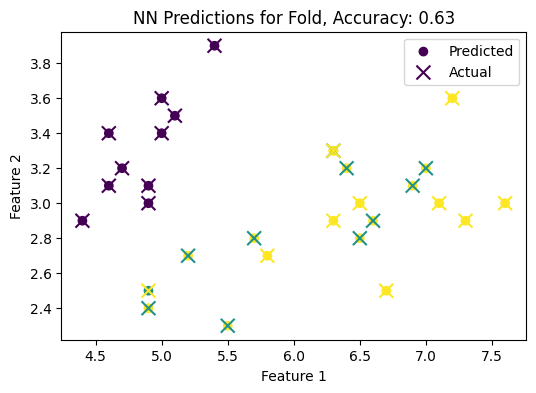

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


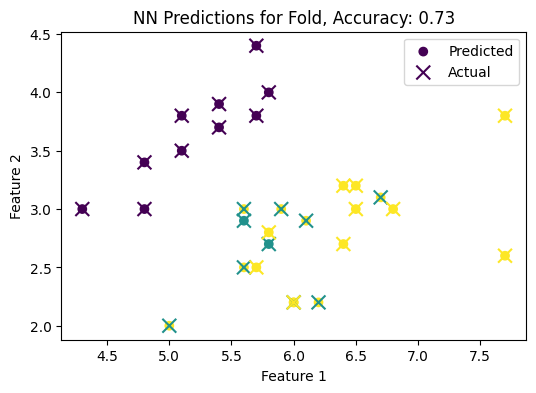

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


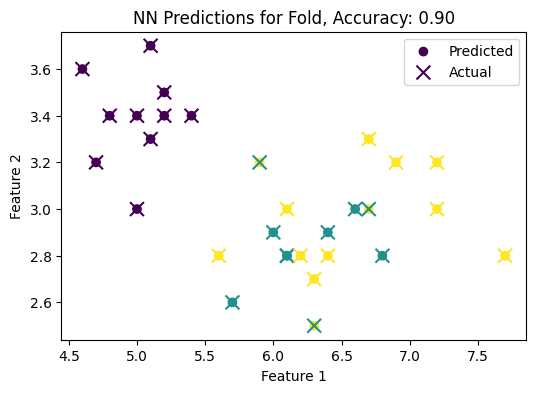

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


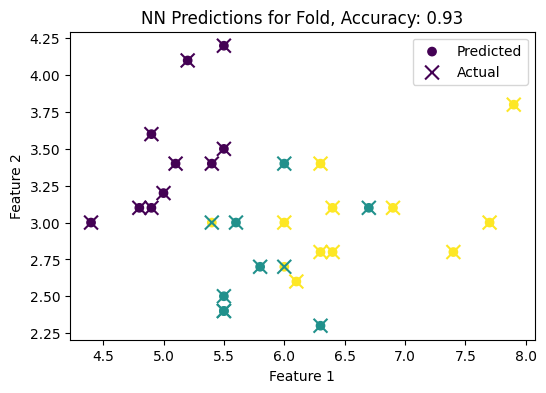

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


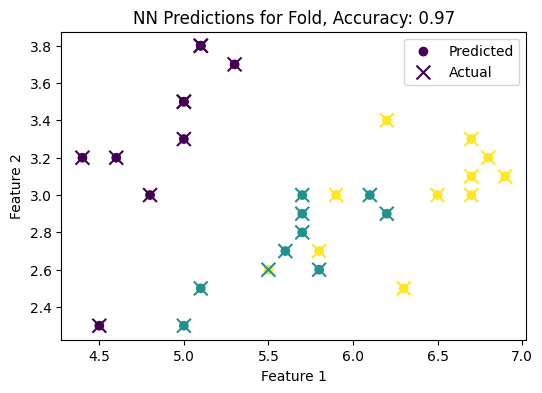


Sequential NN - Scores de K-Fold Cross-Validation: [0.6333333253860474, 0.7333333492279053, 0.8999999761581421, 0.9333333373069763, 0.9666666388511658]
Sequential NN - Promedio de Accuracy: 0.8333333253860473


In [ ]:
# 3. Cross-Validation para Sequential NN (usando KFold)
def create_model():
  model = Sequential()
  model.add(Dense(10, input_dim=4, activation='relu'))
  model.add(Dense(20, input_dim=4, activation='relu'))
  model.add(Dense(10, input_dim=4, activation='relu'))
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Ejemplo con K-Fold Cross-Validation para la red neuronal
nn_model = create_model()
skf = StratifiedKFold(n_splits=5)
scores_nn = []
for train_index, test_index in skf.split(X,y):
  nn_model = create_model()
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  nn_model.fit(X_train, y_train, epochs=50, verbose=0)
  _, accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
  scores_nn.append(accuracy)

  y_pred = np.argmax(nn_model.predict(X[test_index]), axis=-1)  # Predict on test data

  plt.figure(figsize=(6, 4))
  plt.scatter(X[test_index, 0], X[test_index, 1], c=y_pred, marker='o', label='Predicted')
  plt.scatter(X[test_index, 0], X[test_index, 1], c=y[test_index], marker='x', s=100, label='Actual')
  plt.xlabel('Feature 1')
  plt.ylabel('Feature 2')
  plt.title(f'NN Predictions for Fold, Accuracy: {accuracy:.2f}')
  plt.legend()
  plt.show()

print("\nSequential NN - Scores de K-Fold Cross-Validation:", scores_nn)
print("Sequential NN - Promedio de Accuracy:", sum(scores_nn) / len(scores_nn))

In [ ]:
!pip install scikeras

In [ ]:
from scikeras.wrappers import KerasClassifier

nn_model = KerasClassifier(model=create_model, epochs=50, verbose=0)
resultados = cross_val_score(nn_model, X, y, cv=skf,scoring='accuracy')

# Muestra los resultados
print("Precisión promedio en cross-validation:", resultados.mean())
print("Desviación estándar en cross-validation:", resultados.std())

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

Precisión promedio en cross-validation: 0.8333333333333334
Desviación estándar en cross-validation: 0.10540925533894599


## Reference
Author Unknown. (n.d.). Cross-Validation en Python. Deepnote. https://deepnote.com/app/a_mas/Cross-Validation-en-Python-685fa851-b5b2-4c5b-b5fb-3dc5ae64838f
Kingma, E. (2018, August 24). Cross-validation. Towards Data Science. https://towardsdatascience.com/cross-validation-705644663568